In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random

x_train, y_train = datasets.load_svmlight_file('a9a')
x_test, y_test = datasets.load_svmlight_file('a9a.t',n_features=123)
x_train = x_train.toarray()
x_test = x_test.toarray()
#初始化
C = 0.15
epoch = 1800
learningRate = 0.01
batch_size = 50
train_row_size, = y_train.shape
test_row_size, = y_test.shape

In [14]:
def computeLoss_train():
    loss_train = (0.5 * np.linalg.norm(w) ** 2) + C * np.sum(np.maximum(1 - (np.multiply(y_train,(np.dot(x_train, w)+ b))), 0))
    return loss_train/train_row_size

In [15]:
def computeLoss_test():
    loss_test = (0.5 * np.linalg.norm(w) ** 2) + C * np.sum(np.maximum(1 - (np.multiply(y_test,(np.dot(x_test, w)+ b))), 0))
    return loss_test/test_row_size

In [16]:
def computeGradient_train():
    Gwx_array = []
    global b
    b_sum = 0
    for i in range(batch_size):
        temp = random.randint(0,train_row_size-1)
        h = 1 - (y_train[temp] * (np.dot(x_train[temp],w) + b))
        gwx = np.where(h >= 0, (-y_train[temp] * x_train[temp]), 0)
        gwb = np.where(h >= 0, -y_train[temp], 0)
        Gwx_array.append(gwx)
        b_sum += gwb
    G_x = w + C *((np.mean(Gwx_array, axis=0)).T)
    G_b = C * b_sum / batch_size  
    for n in range (123):        
        w[n] = w[n] - learningRate * G_x[n]
    b = b - learningRate * G_b

In [17]:
def computeGradient_test():
    global b
    Gwx_array = []
    b_sum = 0
    for i in range(batch_size):
        temp = random.randint(0,test_row_size-1)
        h = 1 - (y_test[temp] * (np.dot(x_test[temp],w) + b))
        gwx = np.where(h >= 0, (-y_test[temp] * x_test[temp]), 0)
        gwb = np.where(h >= 0, -y_test[temp], 0)
        Gwx_array.append(gwx)
        b_sum += gwb
    G_x = w + C *((np.mean(Gwx_array, axis=0)).T)
    G_b = C * b_sum / batch_size  
    for n in range (123):        
        w[n] = w[n] - learningRate * G_x[n]
    b = b - learningRate * G_b

In [18]:
loss_train = []
loss_test = []
w = np.zeros(123)
b = 0
for i in range(epoch):
    computeGradient_train()
    loss_train.append(computeLoss_train())
w = np.zeros(123)
b = 0
for i in range(epoch):
    computeGradient_test()
    loss_test.append(computeLoss_test())

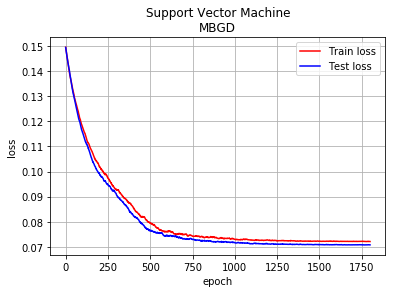

In [19]:
plt.title('Support Vector Machine\nMBGD')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss_train,label= "Train loss",color = 'red')
plt.plot(loss_test,label= "Test loss",color = 'blue')
plt.legend(loc='upper right')
plt.grid()
plt.show()